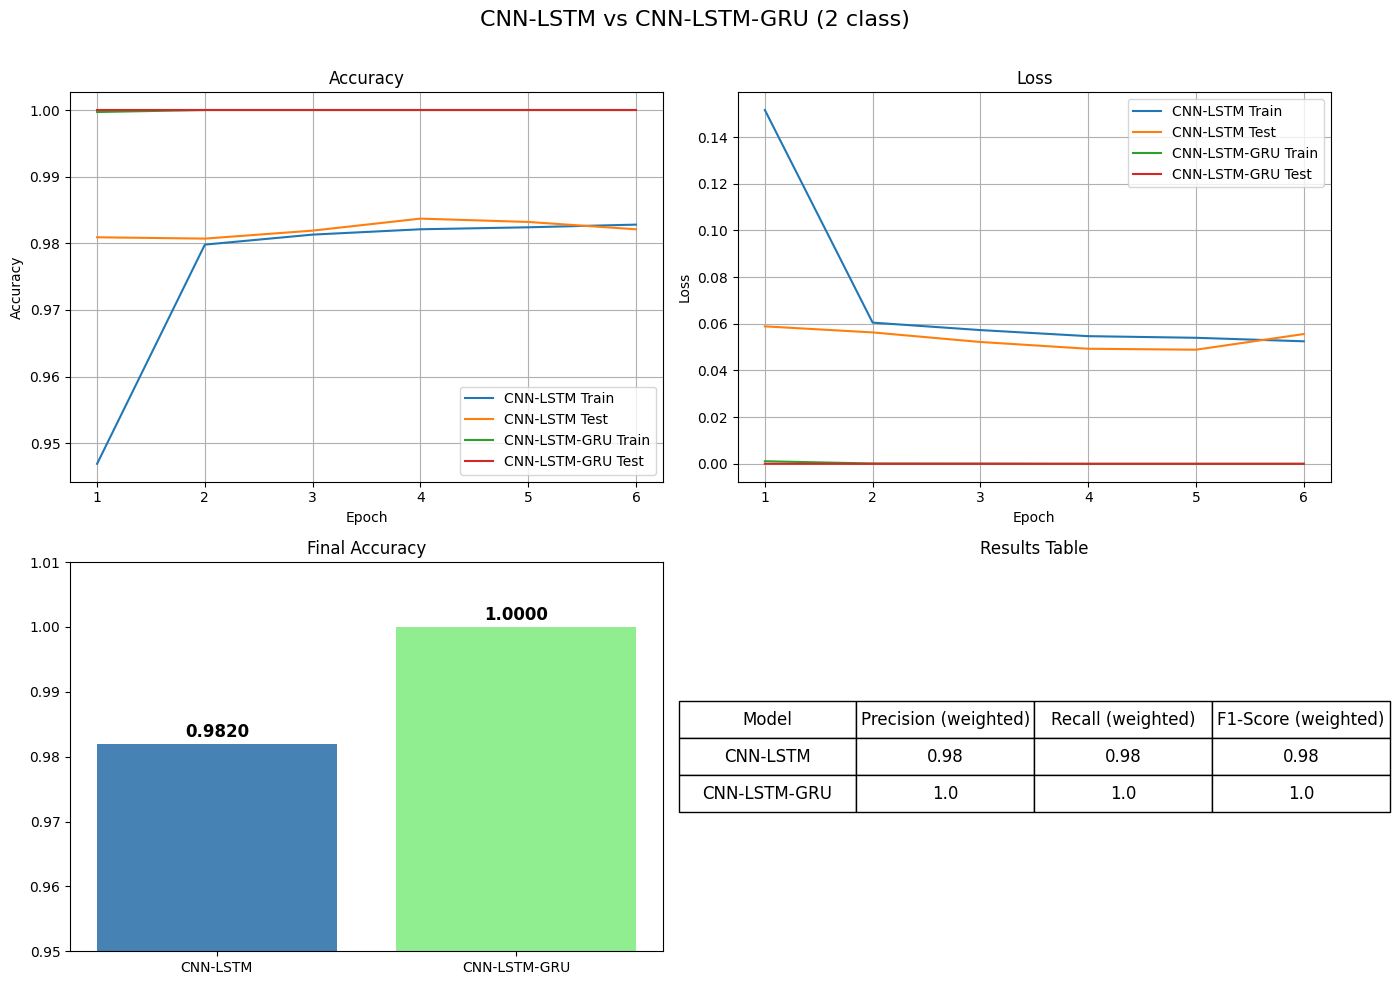

In [3]:
# 2 Class CNN-LSTM vs CNN-LSTM-GRU Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM
cnn_lstm_epochs = np.arange(1, 7)
cnn_lstm_train_acc = [0.9469, 0.9798, 0.9813, 0.9821, 0.9824, 0.9828]
cnn_lstm_test_acc = [0.9809, 0.9807, 0.9819, 0.9837, 0.9832, 0.9821]
cnn_lstm_train_loss = [0.1516, 0.0605, 0.0573, 0.0547, 0.0540, 0.0525]
cnn_lstm_test_loss = [0.0589, 0.0563, 0.0522, 0.0493, 0.0489, 0.0556]
cnn_lstm_final_test_acc = 0.9820
cnn_lstm_final_test_loss = 0.0559

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 7)
cnn_lstm_gru_train_acc = [0.9997, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_test_acc = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_train_loss = [0.0011, 0.0001306, 0.000081947, 2.1156e-10, 1.4664e-11, 7.5520e-11]
cnn_lstm_gru_test_loss = [6.0838e-07, 4.6583e-11, 1.1399e-15, 4.3320e-19, 7.3978e-20, 7.3541e-21]
cnn_lstm_gru_final_test_acc = 1.0000
cnn_lstm_gru_final_test_loss = 0.0000


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM vs CNN-LSTM-GRU (2 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_train_acc, label='CNN-LSTM Train')
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_test_acc, label='CNN-LSTM Test')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_acc, label='CNN-LSTM-GRU Test')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_train_loss, label='CNN-LSTM Train')
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_test_loss, label='CNN-LSTM Test')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_loss, label='CNN-LSTM-GRU Test')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.95, 1.01])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# table
results = pd.DataFrame({
    "Model": models,
    "Precision (weighted)": [0.98, 1.00],
    "Recall (weighted)": [0.98, 1.00],
    "F1-Score (weighted)": [0.98, 1.00]
})
axs[1, 1].axis('off')
table = axs[1, 1].table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2.0)
axs[1, 1].set_title("Results Table")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


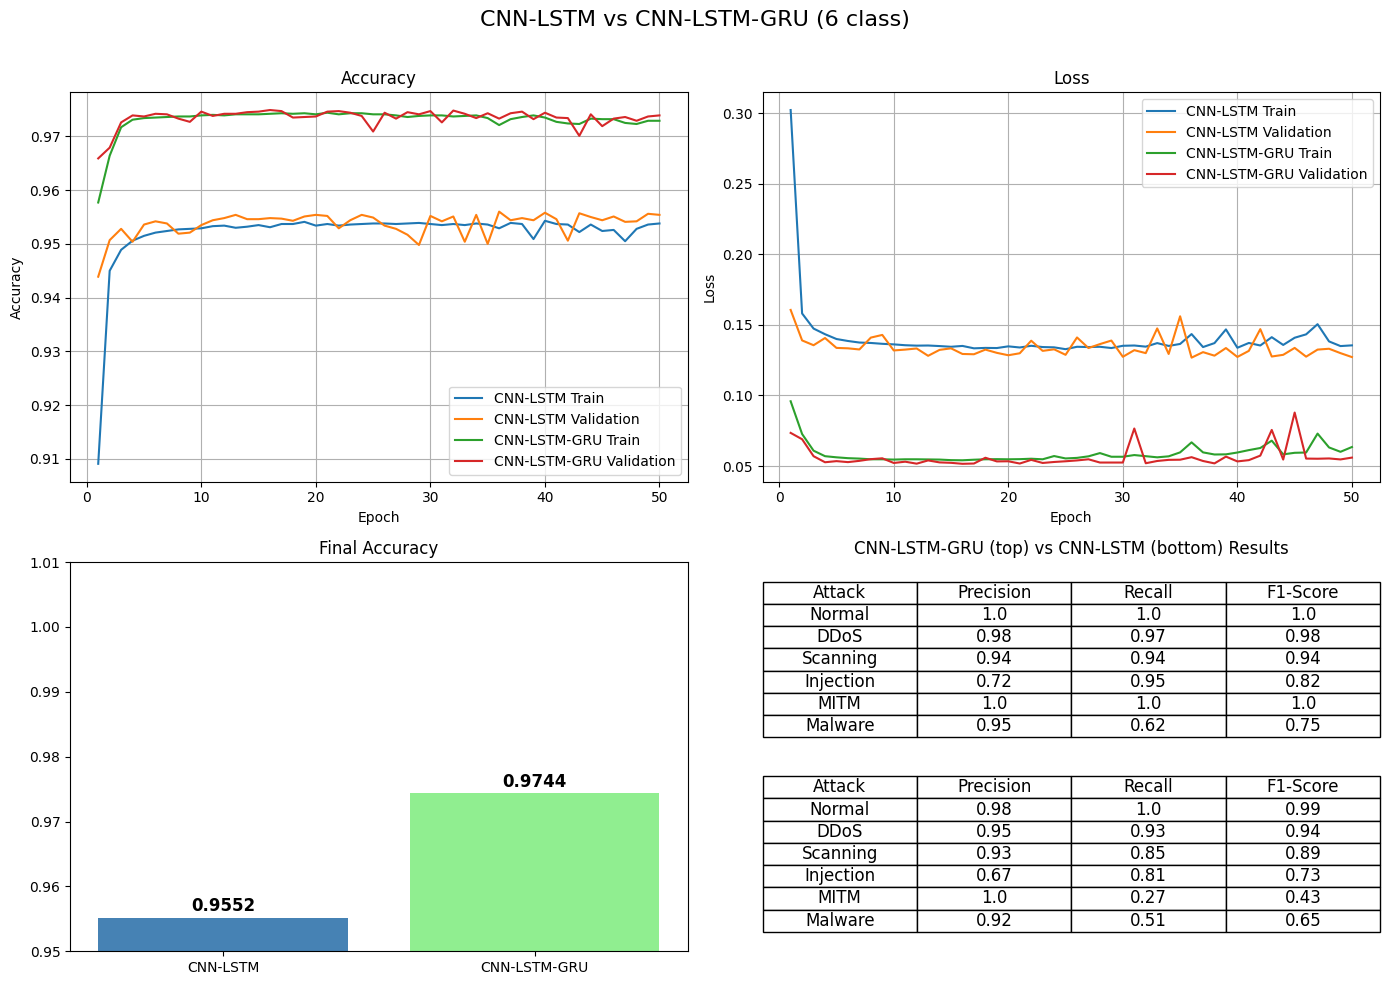

In [14]:
# 6 Class CNN-LSTM vs CNN-LSTM-GRU Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM
cnn_lstm_epochs = np.arange(1, 51)
cnn_lstm_train_acc = [0.9091, 0.9450, 0.9489, 0.9506, 0.9515, 0.9521, 0.9524, 0.9527, 0.9528, 0.9529, 0.9533, 0.9534, 0.9530, 0.9532, 0.9535, 0.9531, 0.9537, 0.9537, 0.9541, 0.9534, 0.9537, 0.9534, 0.9536, 0.9537, 0.9538, 0.9538, 0.9537, 0.9538, 0.9539, 0.9537, 0.9535, 0.9537, 0.9535, 0.9538, 0.9536, 0.9529, 0.9539, 0.9537, 0.9509, 0.9543, 0.9537, 0.9536, 0.9522, 0.9536, 0.9524, 0.9526, 0.9505, 0.9528, 0.9536, 0.9538]
cnn_lstm_val_acc = [0.9439, 0.9507, 0.9528, 0.9504, 0.9536, 0.9542, 0.9538, 0.9519, 0.9521, 0.9535, 0.9544, 0.9548, 0.9554, 0.9546, 0.9546, 0.9548, 0.9547, 0.9543, 0.9551, 0.9554, 0.9552, 0.9529, 0.9544, 0.9554, 0.9549, 0.9534, 0.9528, 0.9517, 0.9498, 0.9552, 0.9542, 0.9551, 0.9504, 0.9554, 0.9500, 0.9560, 0.9544, 0.9548, 0.9544, 0.9558, 0.9546, 0.9506, 0.9557, 0.9550, 0.9544, 0.9551, 0.9541, 0.9542, 0.9556, 0.9554]
cnn_lstm_train_loss = [0.3022, 0.1581, 0.1474, 0.1434, 0.1400, 0.1386, 0.1375, 0.1372, 0.1366, 0.1362, 0.1356, 0.1353, 0.1354, 0.1350, 0.1345, 0.1351, 0.1334, 0.1337, 0.1336, 0.1348, 0.1340, 0.1352, 0.1343, 0.1341, 0.1328, 0.1345, 0.1343, 0.1345, 0.1336, 0.1352, 0.1354, 0.1346, 0.1371, 0.1351, 0.1365, 0.1435, 0.1343, 0.1371, 0.1468, 0.1338, 0.1372, 0.1354, 0.1413, 0.1358, 0.1409, 0.1433, 0.1505, 0.1383, 0.1350, 0.1355]
cnn_lstm_val_loss = [0.1606, 0.1390, 0.1356, 0.1407, 0.1337, 0.1334, 0.1326, 0.1410, 0.1429, 0.1319, 0.1325, 0.1333, 0.1281, 0.1323, 0.1334, 0.1294, 0.1292, 0.1325, 0.1302, 0.1285, 0.1299, 0.1388, 0.1316, 0.1327, 0.1288, 0.1411, 0.1336, 0.1364, 0.1389, 0.1274, 0.1321, 0.1300, 0.1475, 0.1294, 0.1561, 0.1268, 0.1307, 0.1282, 0.1336, 0.1273, 0.1316, 0.1470, 0.1276, 0.1288, 0.1337, 0.1275, 0.1325, 0.1331, 0.1300, 0.1272]
cnn_lstm_final_test_acc = 0.9552
cnn_lstm_final_test_loss = 0.1270

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 51)
cnn_lstm_gru_train_acc = [0.9577, 0.9664, 0.9717, 0.9731, 0.9734, 0.9735, 0.9736, 0.9737, 0.9737, 0.9739, 0.9740, 0.9739, 0.9741, 0.9741, 0.9741, 0.9742, 0.9743, 0.9742, 0.9743, 0.9741, 0.9744, 0.9741, 0.9743, 0.9743, 0.9741, 0.9741, 0.9739, 0.9736, 0.9738, 0.9739, 0.9739, 0.9737, 0.9738, 0.9739, 0.9734, 0.9721, 0.9732, 0.9736, 0.9739, 0.9735, 0.9727, 0.9724, 0.9723, 0.9733, 0.9732, 0.9732, 0.9725, 0.9723, 0.9729, 0.9729]
cnn_lstm_gru_val_acc = [0.9659, 0.9679, 0.9726, 0.9739, 0.9737, 0.9742, 0.9741, 0.9733, 0.9727, 0.9746, 0.9738, 0.9742, 0.9742, 0.9745, 0.9746, 0.9749, 0.9747, 0.9735, 0.9736, 0.9737, 0.9746, 0.9747, 0.9744, 0.9738, 0.9709, 0.9744, 0.9733, 0.9745, 0.9741, 0.9747, 0.9726, 0.9748, 0.9742, 0.9734, 0.9743, 0.9733, 0.9743, 0.9746, 0.9732, 0.9744, 0.9735, 0.9734, 0.9701, 0.9741, 0.9719, 0.9733, 0.9736, 0.9729, 0.9737, 0.9739]
cnn_lstm_gru_train_loss = [0.0959, 0.0727, 0.0609, 0.0570, 0.0562, 0.0556, 0.0553, 0.0548, 0.0548, 0.0546, 0.0548, 0.0548, 0.0547, 0.0546, 0.0542, 0.0541, 0.0545, 0.0548, 0.0549, 0.0548, 0.0549, 0.0552, 0.0548, 0.0571, 0.0554, 0.0558, 0.0569, 0.0592, 0.0566, 0.0566, 0.0578, 0.0570, 0.0562, 0.0569, 0.0597, 0.0668, 0.0597, 0.0582, 0.0583, 0.0596, 0.0613, 0.0628, 0.0680, 0.0583, 0.0594, 0.0596, 0.0730, 0.0632, 0.0601, 0.0635]
cnn_lstm_gru_val_loss = [0.0735, 0.0690, 0.0570, 0.0527, 0.0535, 0.0528, 0.0537, 0.0549, 0.0555, 0.0522, 0.0531, 0.0517, 0.0540, 0.0526, 0.0523, 0.0516, 0.0518, 0.0559, 0.0533, 0.0534, 0.0518, 0.0544, 0.0522, 0.0529, 0.0534, 0.0540, 0.0548, 0.0525, 0.0525, 0.0525, 0.0766, 0.0520, 0.0536, 0.0544, 0.0545, 0.0563, 0.0536, 0.0519, 0.0567, 0.0533, 0.0542, 0.0574, 0.0756, 0.0546, 0.0879, 0.0553, 0.0552, 0.0554, 0.0547, 0.0560]
cnn_lstm_gru_final_test_acc = 0.9744
cnn_lstm_gru_final_test_loss = 0.0532


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM vs CNN-LSTM-GRU (6 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_train_acc, label='CNN-LSTM Train')
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_test_acc, label='CNN-LSTM Validation')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_acc, label='CNN-LSTM-GRU Validation')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_train_loss, label='CNN-LSTM Train')
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_test_loss, label='CNN-LSTM Validation')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_loss, label='CNN-LSTM-GRU Validation')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.95, 1.01])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# table
results_cnn_lstm_gru = pd.DataFrame({
    "Attack": ["Normal", "DDoS", "Scanning", "Injection", "MITM", "Malware"],
    "Precision": [1.00, 0.98, 0.94, 0.72, 1.00, 0.95],
    "Recall": [1.00, 0.97, 0.94, 0.95, 1.00, 0.62],
    "F1-Score": [1.00, 0.98, 0.94, 0.82, 1.00, 0.75]
})

results_cnn_lstm = pd.DataFrame({
    "Attack": ["Normal", "DDoS", "Scanning", "Injection", "MITM", "Malware"],
    "Precision": [0.98, 0.95, 0.93, 0.67, 1.00, 0.92],
    "Recall": [1.00, 0.93, 0.85, 0.81, 0.27, 0.51],
    "F1-Score": [0.99, 0.94, 0.89, 0.73, 0.43, 0.65]
})

# CNN-LSTM-GRU table
axs[1, 1].axis('off')
table_cnn_lstm_gru = axs[1, 1].table(cellText=results_cnn_lstm_gru.values, colLabels=results_cnn_lstm_gru.columns, loc='center', cellLoc='center', bbox=[0, 0.55, 1, 0.4])
table_cnn_lstm_gru.auto_set_font_size(False)
table_cnn_lstm_gru.set_fontsize(12)
table_cnn_lstm_gru.scale(1.2, 1.2)

# CNN-LSTM table
table_cnn_lstm = axs[1, 1].table(cellText=results_cnn_lstm.values, colLabels=results_cnn_lstm.columns, loc='center', cellLoc='center', bbox=[0, 0.05, 1, 0.4])
table_cnn_lstm.auto_set_font_size(False)
table_cnn_lstm.set_fontsize(12)
table_cnn_lstm.scale(1.2, 1.2)
axs[1, 1].set_title("CNN-LSTM-GRU (top) vs CNN-LSTM (bottom) Results")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


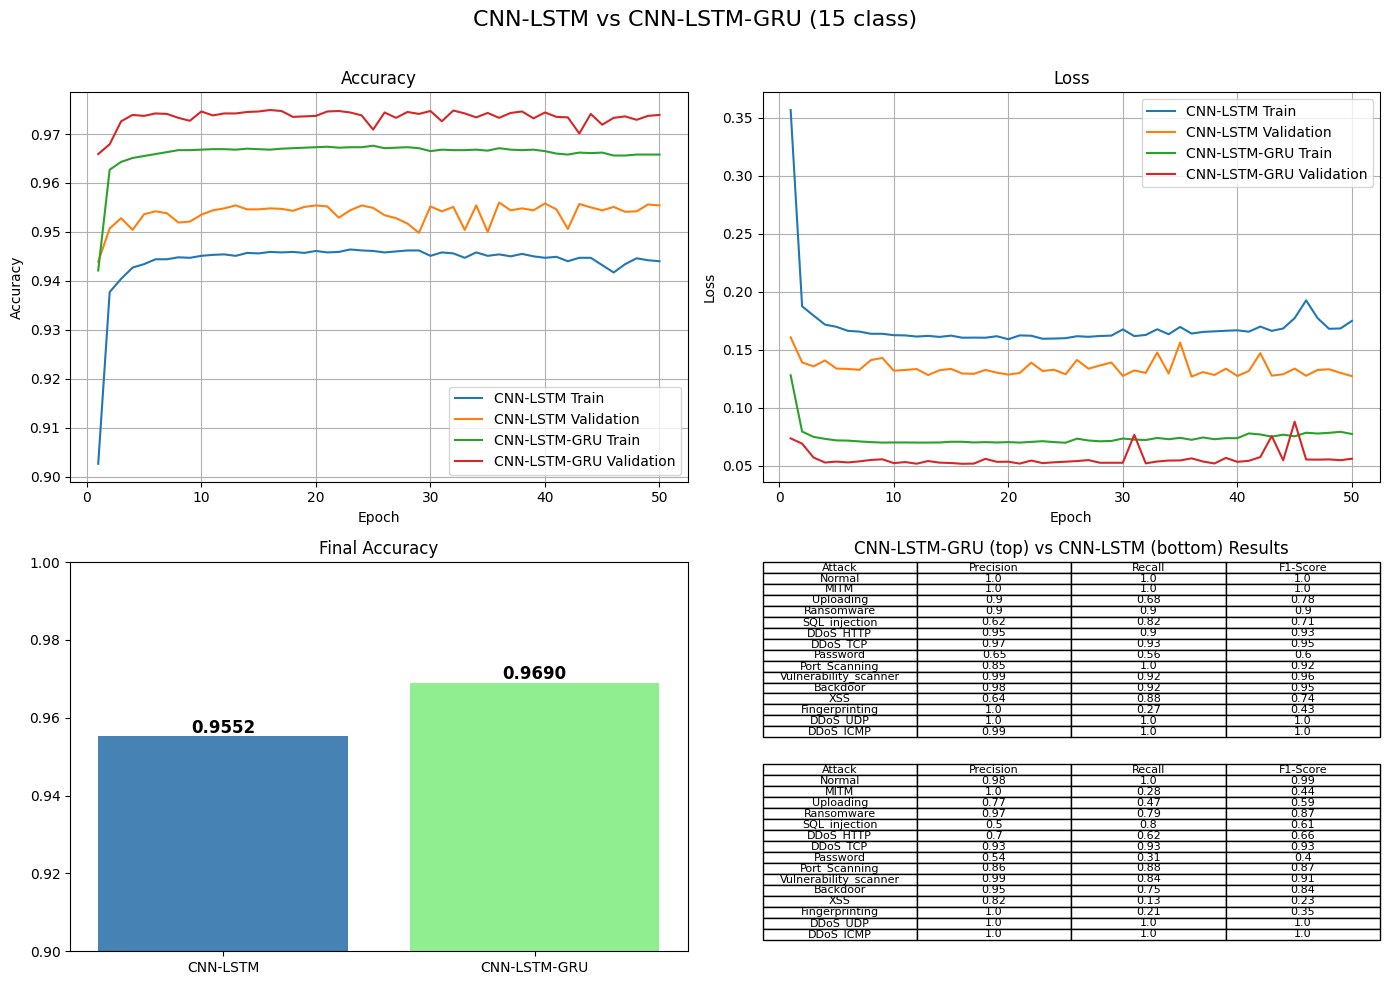

In [21]:
# 15 Class CNN-LSTM vs CNN-LSTM-GRU Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM
cnn_lstm_epochs = np.arange(1, 51)
cnn_lstm_train_acc = [0.9026, 0.9377, 0.9404, 0.9427, 0.9434, 0.9444, 0.9444, 0.9448, 0.9447, 0.9451, 0.9453, 0.9454, 0.9451, 0.9457, 0.9456, 0.9459, 0.9458, 0.9459, 0.9457, 0.9461, 0.9458, 0.9459, 0.9464, 0.9462, 0.9461, 0.9458, 0.9460, 0.9462, 0.9462, 0.9451, 0.9458, 0.9456, 0.9447, 0.9458, 0.9451, 0.9454, 0.9450, 0.9455, 0.9450, 0.9447, 0.9449, 0.9440, 0.9447, 0.9447, 0.9432, 0.9417, 0.9434, 0.9446, 0.9442, 0.9440]
cnn_lstm_val_acc = [0.9334, 0.9416, 0.9436, 0.9451, 0.9308, 0.9454, 0.9453, 0.9458, 0.9464, 0.9466, 0.9461, 0.9467, 0.9470, 0.9471, 0.9463, 0.9468, 0.9475, 0.9457, 0.9463, 0.9467, 0.9464, 0.9470, 0.9476, 0.9468, 0.9469, 0.9465, 0.9474, 0.9442, 0.9401, 0.9450, 0.9465, 0.9464, 0.9475, 0.9464, 0.9442, 0.9458, 0.9467, 0.9450, 0.9476, 0.9461, 0.9466, 0.9461, 0.9463, 0.9463, 0.9466, 0.9465, 0.9458, 0.9449, 0.9463, 0.9448]
cnn_lstm_train_loss = [0.3566, 0.1874, 0.1794, 0.1716, 0.1697, 0.1662, 0.1656, 0.1637, 0.1637, 0.1625, 0.1623, 0.1613, 0.1619, 0.1610, 0.1621, 0.1603, 0.1604, 0.1603, 0.1616, 0.1590, 0.1623, 0.1620, 0.1594, 0.1596, 0.1599, 0.1616, 0.1611, 0.1618, 0.1621, 0.1675, 0.1617, 0.1627, 0.1676, 0.1633, 0.1696, 0.1639, 0.1653, 0.1658, 0.1663, 0.1667, 0.1655, 0.1699, 0.1662, 0.1683, 0.1772, 0.1925, 0.1772, 0.1680, 0.1683, 0.1748]
cnn_lstm_val_loss = [0.1928, 0.1700, 0.1669, 0.1641, 0.2182, 0.1618, 0.1593, 0.1581, 0.1598, 0.1556, 0.1572, 0.1589, 0.1549, 0.1539, 0.1557, 0.1554, 0.1537, 0.1585, 0.1597, 0.1587, 0.1583, 0.1555, 0.1535, 0.1590, 0.1554, 0.1597, 0.1549, 0.1654, 0.2351, 0.1573, 0.1586, 0.1550, 0.1566, 0.1572, 0.1653, 0.1604, 0.1580, 0.1592, 0.1562, 0.1642, 0.1566, 0.1584, 0.1580, 0.2646, 0.1571, 0.1612, 0.1640, 0.1622, 0.1590, 0.1609]
cnn_lstm_final_test_acc = 0.9552
cnn_lstm_final_test_loss = 0.1270

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 51)
cnn_lstm_gru_train_acc = [0.9421, 0.9627, 0.9643, 0.9651, 0.9655, 0.9659, 0.9663, 0.9667, 0.9667, 0.9668, 0.9669, 0.9669, 0.9668, 0.9670, 0.9669, 0.9668, 0.9670, 0.9671, 0.9672, 0.9673, 0.9674, 0.9672, 0.9673, 0.9673, 0.9676, 0.9671, 0.9672, 0.9673, 0.9671, 0.9665, 0.9668, 0.9667, 0.9667, 0.9668, 0.9666, 0.9671, 0.9668, 0.9667, 0.9668, 0.9665, 0.9660, 0.9658, 0.9662, 0.9661, 0.9662, 0.9656, 0.9656, 0.9658, 0.9658, 0.9658]
cnn_lstm_gru_val_acc = [0.9625, 0.9657, 0.9647, 0.9667, 0.9662, 0.9663, 0.9668, 0.9647, 0.9669, 0.9674, 0.9685, 0.9642, 0.9680, 0.9685, 0.9651, 0.9670, 0.9675, 0.9687, 0.9686, 0.9665, 0.9691, 0.9688, 0.9677, 0.9686, 0.9687, 0.9684, 0.9688, 0.9676, 0.9683, 0.9673, 0.9678, 0.9680, 0.9682, 0.9665, 0.9675, 0.9685, 0.9673, 0.9679, 0.9669, 0.9678, 0.9681, 0.9678, 0.9684, 0.9673, 0.9674, 0.9653, 0.9646, 0.9675, 0.9674, 0.9683 ]
cnn_lstm_gru_train_loss = [0.1279, 0.0794, 0.0748, 0.0731, 0.0718, 0.0716, 0.0709, 0.0703, 0.0699, 0.0700, 0.0700, 0.0699, 0.0699, 0.0700, 0.0706, 0.0706, 0.0700, 0.0703, 0.0700, 0.0703, 0.0699, 0.0705, 0.0711, 0.0703, 0.0698, 0.0733, 0.0717, 0.0710, 0.0713, 0.0734, 0.0725, 0.0721, 0.0739, 0.0728, 0.0740, 0.0723, 0.0743, 0.0728, 0.0737, 0.0737, 0.0778, 0.0769, 0.0750, 0.0767, 0.0753, 0.0784, 0.0777, 0.0783, 0.0792, 0.0773]
cnn_lstm_gru_val_loss = [0.0791, 0.0718, 0.0740, 0.0699, 0.0757, 0.0676, 0.0672, 0.0722, 0.0682, 0.0661, 0.0652, 0.0742, 0.0651, 0.0644, 0.0928, 0.0666, 0.0666, 0.0657, 0.0635, 0.0761, 0.0656, 0.0642, 0.0657, 0.0644, 0.0640, 0.0646, 0.0651, 0.0664, 0.0661, 0.0703, 0.0670, 0.0665, 0.0650, 0.0688, 0.0717, 0.0655, 0.0759, 0.0653, 0.0677, 0.0686, 0.0651, 0.0688, 0.0661, 0.0667, 0.0691, 0.0718, 0.0751, 0.0675, 0.0701, 0.0642]
cnn_lstm_gru_final_test_acc = 0.9690
cnn_lstm_gru_final_test_loss = 0.0632


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM vs CNN-LSTM-GRU (15 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_train_acc, label='CNN-LSTM Train')
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_test_acc, label='CNN-LSTM Validation')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_acc, label='CNN-LSTM-GRU Validation')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_train_loss, label='CNN-LSTM Train')
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_test_loss, label='CNN-LSTM Validation')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_loss, label='CNN-LSTM-GRU Validation')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.90, 1.00])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# table
results_cnn_lstm_gru = pd.DataFrame({
    "Attack": ["Normal", "MITM", "Uploading", "Ransomware", "SQL_injection", "DDoS_HTTP", "DDoS_TCP", "Password", "Port_Scanning", "Vulnerability_scanner", "Backdoor", "XSS", "Fingerprinting", "DDoS_UDP", "DDoS_ICMP"],
    "Precision": [1.00, 1.00, 0.90, 0.90, 0.62, 0.95, 0.97, 0.65, 0.85, 0.99, 0.98, 0.64, 1.00, 1.00, 0.99],
    "Recall": [1.00, 1.00, 0.68, 0.90, 0.82, 0.90, 0.93, 0.56, 1.00, 0.92, 0.92, 0.88, 0.27, 1.00, 1.00],
    "F1-Score": [1.00, 1.00, 0.78, 0.90, 0.71, 0.93, 0.95, 0.60, 0.92, 0.96, 0.95, 0.74, 0.43, 1.00, 1.00]

})

results_cnn_lstm = pd.DataFrame({
    "Attack": ["Normal", "MITM", "Uploading", "Ransomware", "SQL_injection", "DDoS_HTTP", "DDoS_TCP", "Password", "Port_Scanning", "Vulnerability_scanner", "Backdoor", "XSS", "Fingerprinting", "DDoS_UDP", "DDoS_ICMP"],
    "Precision": [0.98, 1.00, 0.77, 0.97, 0.50, 0.70, 0.93, 0.54, 0.86, 0.99, 0.95, 0.82, 1.00, 1.00, 1.00],
    "Recall": [1.00, 0.28, 0.47, 0.79, 0.80, 0.62, 0.93, 0.31, 0.88, 0.84, 0.75, 0.13, 0.21, 1.00, 1.00],
    "F1-Score": [0.99, 0.44, 0.59, 0.87, 0.61, 0.66, 0.93, 0.40, 0.87, 0.91, 0.84, 0.23, 0.35, 1.00, 1.00]
})

# CNN-LSTM-GRU table
axs[1, 1].axis('off')
table_cnn_lstm_gru = axs[1, 1].table(cellText=results_cnn_lstm_gru.values, colLabels=results_cnn_lstm_gru.columns, loc='center', cellLoc='center', bbox=[0, 0.55, 1, 0.45])
table_cnn_lstm_gru.auto_set_font_size(False)
table_cnn_lstm_gru.set_fontsize(8)
table_cnn_lstm_gru.scale(1.2, 1.2)

# CNN-LSTM table
table_cnn_lstm = axs[1, 1].table(cellText=results_cnn_lstm.values, colLabels=results_cnn_lstm.columns, loc='center', cellLoc='center', bbox=[0, 0.03, 1, 0.45])
table_cnn_lstm.auto_set_font_size(False)
table_cnn_lstm.set_fontsize(8)
table_cnn_lstm.scale(1.2, 1.2)
axs[1, 1].set_title("CNN-LSTM-GRU (top) vs CNN-LSTM (bottom) Results")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()